# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = "iris_dataset.csv"

# Importing data

In [4]:
# Define the col names for the iris dataset
df=pd.read_csv(Ruta)
df

# Dataset url


# Load the dataset from HHDD


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [7]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [8]:
df.dropna(inplace=True)
print(df.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [12]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
#df['target'] = df['target'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df = df.rename(columns={'target': 'flower'})
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower']
df
#Visualize the dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

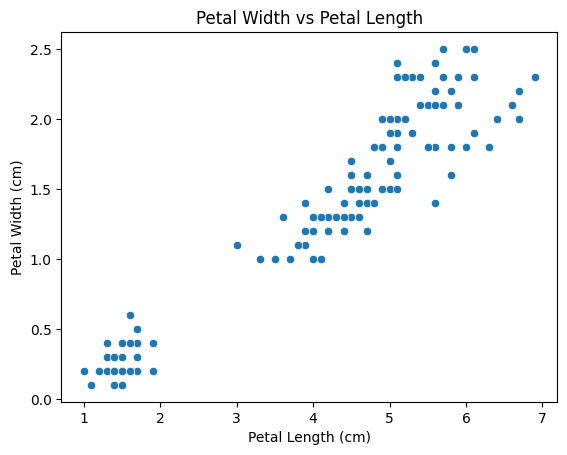

In [13]:
sns.scatterplot(x='Petal_Length', y='Petal_Width', data=df)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs Petal Length')
plt.show()

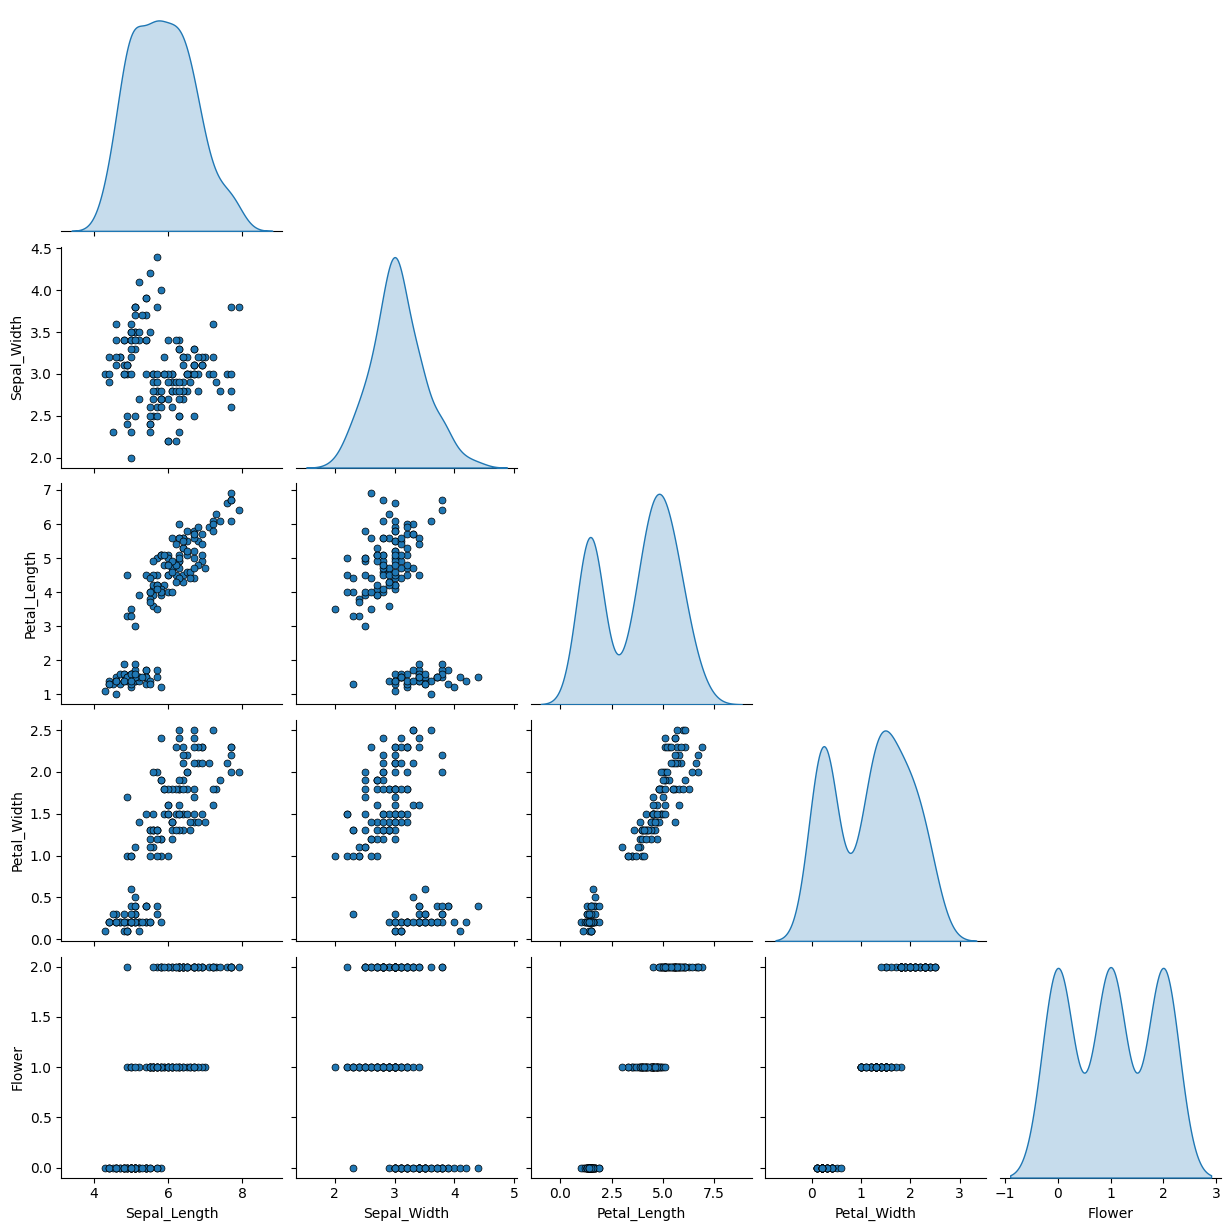

In [22]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, diag_kind="kde", kind="scatter", plot_kws={'s': 25, 'edgecolor': 'k', 'linewidth': 0.5}, corner=True)

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

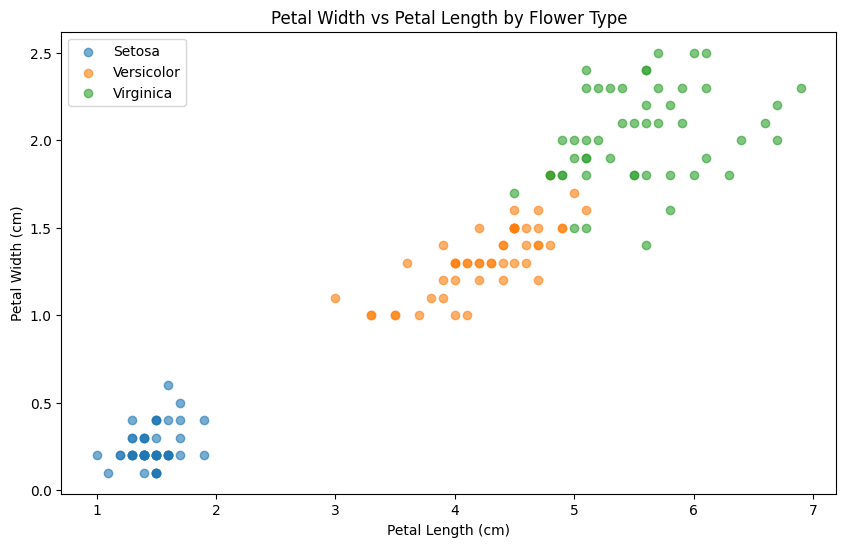

In [20]:
# Get dataframes for each real cluster
df_setosa = df[df['Flower'] == 0]
df_versicolor = df[df['Flower'] == 1]
df_virginica = df[df['Flower'] == 2]

plt.figure(figsize=(10, 6))
plt.scatter(df_setosa['Petal_Length'], df_setosa['Petal_Width'], label='Setosa', alpha=0.6)
plt.scatter(df_versicolor['Petal_Length'], df_versicolor['Petal_Width'], label='Versicolor', alpha=0.6)
plt.scatter(df_virginica['Petal_Length'], df_virginica['Petal_Width'], label='Virginica', alpha=0.6)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs Petal Length by Flower Type')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [45]:
from sklearn.cluster import KMeans

# Import sklearn KMeans
# Define number of clusters
num_clusters = 3

# Do K-means clustering (assign each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster 1 (4 variables)'] = kmeans.fit_predict(df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
#df['Cluster 2 (Petal vs Sepal)']= kmeans.fit_predict(df[['Petal_Length', 'Sepal_Length']])

# Print estimated cluster of each point in the dataset
df['Cluster 1 (4 variables)'].value_counts()   



Cluster 1 (4 variables)
2    61
1    50
0    39
Name: count, dtype: int64

In [40]:
df.head()
#df.drop(['Cluster 2 (Petal W vs L)'], axis=1, inplace=True)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster 1 (4 variables),Cluster 2 (Petal vs Sepal)
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [41]:
# Manual pairing the labels of the real and estimated clusters
df[['Flower', 'Cluster 1 (4 variables)']]

print(df.groupby('Flower')['Cluster 1 (4 variables)'].value_counts())

Flower  Cluster 1 (4 variables)
0       1                          50
1       2                          47
        0                           3
2       0                          36
        2                          14
Name: count, dtype: int64


In [ ]:
# Add a new column to the dataset with the cluster information
#done

In [42]:
# Label of the estimated clusters
df['Cluster 1 (4 variables)'] = df['Cluster 1 (4 variables)'].map({1: 0, 2: 1, 0: 2})
print(df.groupby('Flower')['Cluster 1 (4 variables)'].value_counts())

Flower  Cluster 1 (4 variables)
0       0                          50
1       1                          47
        2                           3
2       2                          36
        1                          14
Name: count, dtype: int64


In [43]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster 1 (4 variables),Cluster 2 (Petal vs Sepal)
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0
146,6.3,2.5,5.0,1.9,2,1,2
147,6.5,3.0,5.2,2.0,2,2,0
148,6.2,3.4,5.4,2.3,2,2,0


In [46]:
# Cluster centroides
centroids = kmeans.cluster_centers_
print("Cluster centroids for 'Cluster 1 (4 variables)':")
print(centroids)


Cluster centroids for 'Cluster 1 (4 variables)':
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [47]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(f"Sum of squared error (sse) of the final model: {sse}")

Sum of squared error (sse) of the final model: 78.94506582597731


In [48]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(f"Number of iterations required to converge: {iterations}")

Number of iterations required to converge: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

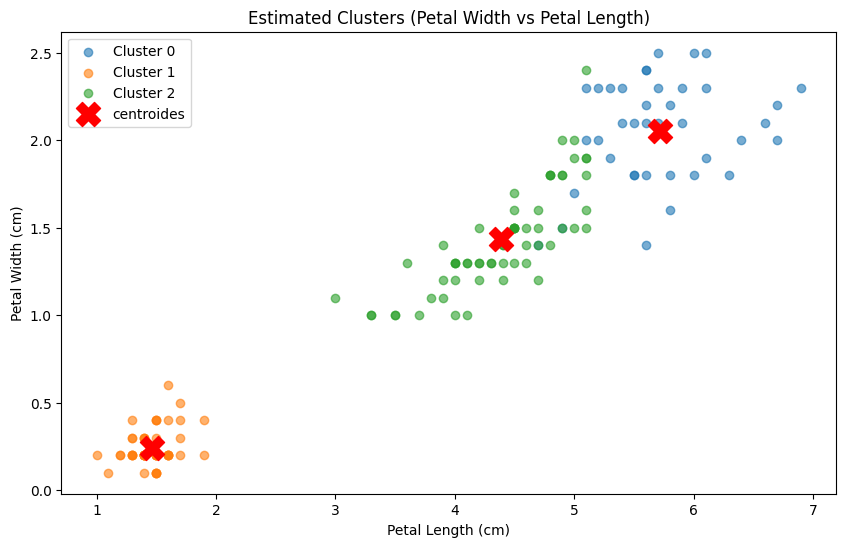

In [51]:
# Plot estimated clusters
plt.figure(figsize=(10, 6))
# plotear petal length vs petal width para poderlo ver en dos dimensiones
plt.scatter(df[df['Cluster 1 (4 variables)'] == 0]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 0]['Petal_Width'], label='Cluster 0', alpha=0.6)
plt.scatter(df[df['Cluster 1 (4 variables)'] == 1]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 1]['Petal_Width'], label='Cluster 1', alpha=0.6)
plt.scatter(df[df['Cluster 1 (4 variables)'] == 2]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 2]['Petal_Width'], label='Cluster 2', alpha=0.6)
plt.scatter(centroids[:, 2], centroids[:, 3], s=300, c='red', label='centroides', marker='X')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Estimated Clusters (Petal Width vs Petal Length)')
plt.legend()

## Plot both real and estimated clusters to check for errors

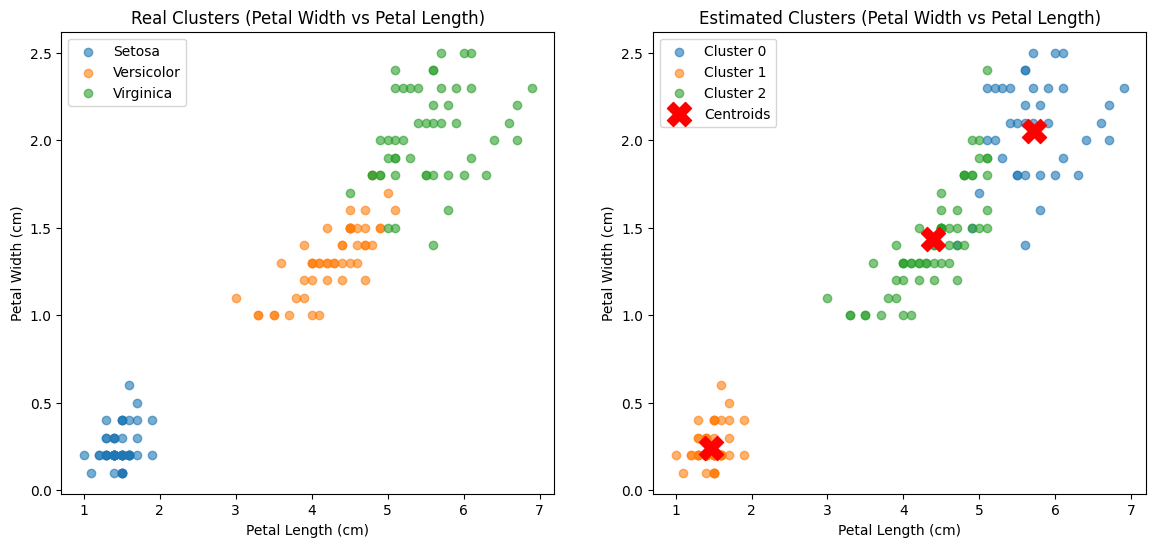

In [52]:
# Plot real clusters
#igualmente se plotean solo dos variables para la visualización en 2d
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_setosa['Petal_Length'], df_setosa['Petal_Width'], label='Setosa', alpha=0.6)
plt.scatter(df_versicolor['Petal_Length'], df_versicolor['Petal_Width'], label='Versicolor', alpha=0.6)
plt.scatter(df_virginica['Petal_Length'], df_virginica['Petal_Width'], label='Virginica', alpha=0.6)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Real Clusters (Petal Width vs Petal Length)')
plt.legend()

# Plot estimated clusters
plt.subplot(1, 2, 2)
plt.scatter(df[df['Cluster 1 (4 variables)'] == 0]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 0]['Petal_Width'], label='Cluster 0', alpha=0.6)
plt.scatter(df[df['Cluster 1 (4 variables)'] == 1]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 1]['Petal_Width'], label='Cluster 1', alpha=0.6)
plt.scatter(df[df['Cluster 1 (4 variables)'] == 2]['Petal_Length'], df[df['Cluster 1 (4 variables)'] == 2]['Petal_Width'], label='Cluster 2', alpha=0.6)
plt.scatter(centroids[:, 2], centroids[:, 3], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Estimated Clusters (Petal Width vs Petal Length)')
plt.legend()

plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

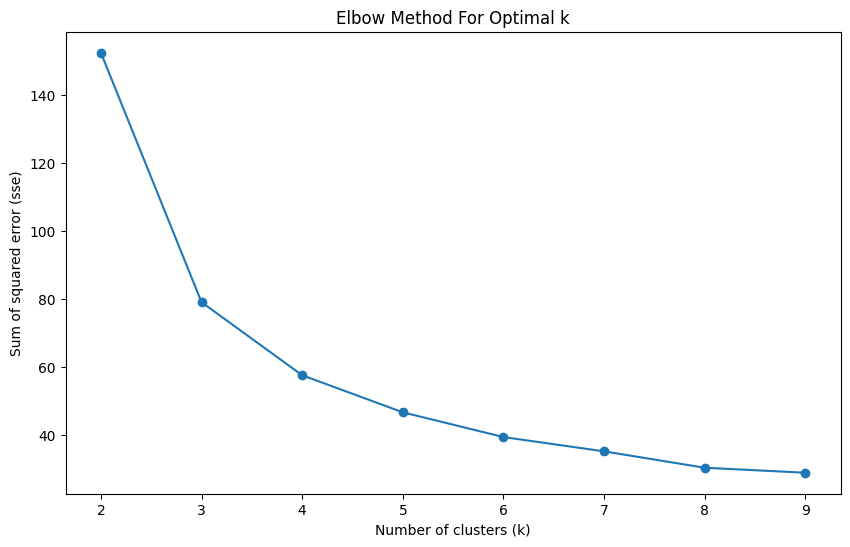

In [53]:

# Initialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(2, 10)

# For each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (sse)')
plt.title('Elbow Method For Optimal k')
plt.show()

Choose the k after which the sse is minimally reduced


In [ ]:
# la k con la que el error será menor es igual al número de observaciones, lo cual es 149, pero esto no servirá para clasificar.

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k